In [123]:
from pathlib import Path

import gin
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.game import ISR

In [118]:
def plot(logdir, savedir):
    if savedir:
        savepath = Path(savedir)
        
    logpath = Path(logdir)    

    config_file = next(logpath.glob('**/*.gin'))
    gin.parse_config_file(config_file, skip_unknown=True)
    env = ISR()
    
    run_logs = []
    for path in logpath.glob('**/*.json'):
        print(f'plotting from {path}')
        with open(path, 'r') as logfile:
            run_logs.append(pd.read_json(logfile))

    logs = pd.concat(run_logs, ignore_index=True)
    sender = pd.DataFrame(logs['sender'].to_list()).join(logs['episode'])
    recver = pd.DataFrame(logs['recver'].to_list()).join(logs['episode'])
    test = pd.DataFrame(logs['test'].to_list()).join(logs['episode'])

    
    sns.set()
    
    # Rewards
    sns.lineplot(data=sender, x="episode", y="reward", label="sender")
    sns.lineplot(data=recver, x="episode", y="reward", label="recver")

    # Baselines
    nocomm_loss = torch.tensor(env.observation_space.n / 4)
    nocomm_rew = env._reward(nocomm_loss)
    oneshot_loss = env.bias_space.low / 2 + (env.bias_space.range) / 4
    oneshot_rew = env._reward(oneshot_loss)
    plt.axhline(nocomm_rew, label='no communication', color="black", dashes=(2,2,2,2))
    plt.axhline(oneshot_rew, label='fair split', color="grey", dashes=(2,2,2,2))

    plt.legend()
    if savedir:
        plt.savefig(savepath / 'rewards.png')
    plt.show()
    plt.clf()

    # REWARD PER ROUND
#     sround = np.array(sender['round_reward'])
#     rround = np.array(recver['round_reward'])
#     avg_round = (sround + rround) / 2
#     for r in range(env.num_rounds):
#         # plt.plot(x, running_mean(avg_round[:,r]), label='avg_round-{}'.format(r))
#         # plt.plot(x, running_mean(sround[:,r]), label='sender-{}'.format(r))
#         plt.plot(x, running_mean(rround[:,r]), label='recver-{}'.format(r))
#     plt.axhline(oneshot_rew, label='one-shot baseline')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/round.png')
#     plt.show()
#     plt.clf()

    # WEIGHTS
    # weights = np.array(recver['weights'])
    # biases = np.array(recver['biases'])[:,np.newaxis]
    # num_weights = weights.shape[1]
    # for i in range(num_weights):
        # plt.plot(x, running_mean(weights[:,i]), label=f'weight {i}')
        # plt.plot(x, running_mean(biases[:,i]), label=f'bias {i}')
    # plt.title('Weights')
    # plt.legend()
    # if savedir:
        # plt.savefig(f'{savedir}/weights.png')
    # plt.show()

    # # ABS DIFF AT ROUND 5
    # plt.plot(x, running_mean(env.send_diffs), label='sender')
    # plt.plot(x, running_mean(env.recv_diffs), label='recver')
    # plt.title('Absolute diff at Round 5')
    # plt.legend()
    # if savedir:
        # plt.savefig(f'{savedir}/diff.png')
    # plt.show()

    # Sender and Recver Output Samples
#     for sample in ["0", "15", "30"]:
#         sns.lineplot(data=sender, x=sender.index, y=sample, label=sample)

#     plt.title('Sender output samples')
#     plt.ylabel('')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/send_samples.png')
#     plt.show()
#     plt.clf()

#     for sample in ["0", "15", "30"]:
#         sns.lineplot(data=recver, x=recver.index, y=sample, label=sample)
#     plt.title('Recver output samples')
#     plt.legend()
#     if savedir:
#         plt.savefig(f'{savedir}/recv_samples.png')
#     plt.show()
#     plt.clf()

    # # ENTROPY
    # if 'entropy' in recver:
        # plt.plot(x, recver['entropy'], label='entropy')
        # plt.legend()
        # if savedir:
            # plt.savefig(f'{savedir}/entropy.png')
        # plt.show()


plotting from ../results/deter-deter-bias9-vocab2/1/logs.json
plotting from ../results/deter-deter-bias9-vocab2/4/logs.json
plotting from ../results/deter-deter-bias9-vocab2/5/logs.json
plotting from ../results/deter-deter-bias9-vocab2/3/logs.json
plotting from ../results/deter-deter-bias9-vocab2/2/logs.json


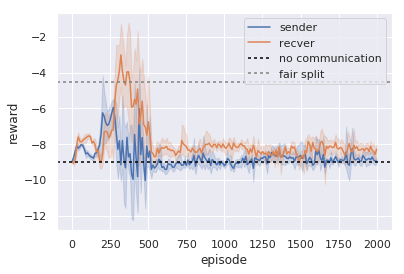

<Figure size 432x288 with 0 Axes>

In [115]:
from src.game import ISR

game = ISR(
    batch_size=128,
    min_bias=0,
    num_rounds=10,
    num_targets=36)

logpath = '../results/deter-deter-bias9-vocab2'

with sns.plotting_context('talk'):
#     plt.title('Bias 0 / 18')
    plot(logpath, logpath)


plotting from /home/mnoukhov/emergent-selfish/results/test-vocab2/1/logs.json
plotting from /home/mnoukhov/emergent-selfish/results/test-vocab2/3/logs.json
plotting from /home/mnoukhov/emergent-selfish/results/test-vocab2/2/logs.json


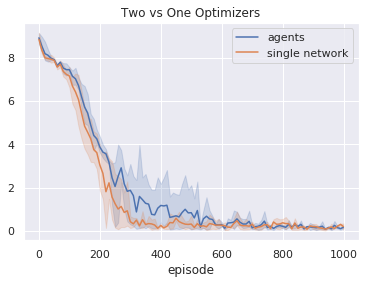

In [134]:
logdir = '/home/mnoukhov/emergent-selfish/results/test-vocab2'

logpath = Path(logdir)    

config_file = next(logpath.glob('**/*.gin'))
gin.parse_config_file(config_file, skip_unknown=True)
env = ISR()

run_logs = []
for path in logpath.glob('**/*.json'):
    print(f'plotting from {path}')
    with open(path, 'r') as logfile:
        run_logs.append(pd.read_json(logfile))

logs = pd.concat(run_logs, ignore_index=True)
sender = pd.DataFrame(logs['sender'].to_list()).join(logs['episode'])
recver = pd.DataFrame(logs['recver'].to_list()).join(logs['episode'])
test = pd.DataFrame(logs['test'].to_list()).join(logs['episode'])

sns.lineplot(data=sender, x="episode", y="loss", label="agents")
# sns.lineplot(data=recver, x="episode", y="loss", label="recver")
sns.lineplot(data=test, x="episode", y="loss", label="single network")

# for sample in ["0", "15", "30"]:
#     sns.lineplot(data=sender, x=sender.index, y=sample, label=sample)


# # sns.lineplot(data=sender, x=sender.index, y="round_reward", label="sender")
plt.title("Two vs One Optimizers")
plt.ylabel('')
plt.legend()

In [3]:
sns.load_dataset('fmri')

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
